In [1]:
%load_ext autoreload
%autoreload 2

1. Identificar as bordas usando os métodos de Sobel, Roberts, Prewit, laplaciano (apresentar também a identificação das linhas verticais e horizontais), usando filtro da média e sem o filtro da média
2. Procurar uma outra técnica para identificação de bordas, usando filtro da média e sem o filtro da média
3. Usar K-Mens para identificar os objetos das imagens, dependendo use técnicas já apresentadas
4. Identificar pontos na imagem, dependendo use técnicas já apresentadas

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import time

from scipy import ndimage

In [3]:
def plotar(img, figsize=(15,20)):
    try:
        channel = img.shape[2]
    except:
        channel = 1
    plt.figure(figsize=figsize)
    if channel == 1:
        plt.imshow(img, cmap='gray')
    elif channel == 3:
        plt.imshow(img)

## As imagens utilizadas nesse notebook estão disponível em : 
[Link para as imagens no github](https://github.com/pedrodsk/pdi/tree/master/imgs_pdi)
* Atenção a cédula abaixo para a posição das imagens, um nível anterior ao notebook e na pasta imgs_pdi

In [4]:
imgs_list = glob.glob('../imgs_pdi/*')

In [5]:
imgs_list.sort()

In [6]:
for img in enumerate(imgs_list):
    print(img)

(0, '../imgs_pdi/aorta.jpg')
(1, '../imgs_pdi/cubo_magico.jpg')
(2, '../imgs_pdi/fpb.png')
(3, '../imgs_pdi/hsv_python.png')
(4, '../imgs_pdi/joelho.jpg')
(5, '../imgs_pdi/leao.jpeg')
(6, '../imgs_pdi/montanha.jpg')
(7, '../imgs_pdi/paisagem.jpg')
(8, '../imgs_pdi/pedestres02.jpg')
(9, '../imgs_pdi/pelagem.jpg')
(10, '../imgs_pdi/pre-historia01.jpeg')
(11, '../imgs_pdi/pre-historia02.jpeg')
(12, '../imgs_pdi/psicopata.jpg')
(13, '../imgs_pdi/rainbow-fruits.jpg')


## Escolha o número da imagem : 

In [24]:
img_path = imgs_list[0]

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_mean = cv2.medianBlur(img_gray, 5)

kernel = np.ones((3,3),np.float32)/9
img_mean2 = cv2.filter2D(img_gray,-1,kernel)

# for img in imgs_list:
#     img = cv2.imread(img)
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plotar(img_rgb)

# Questão 01

## Sobel

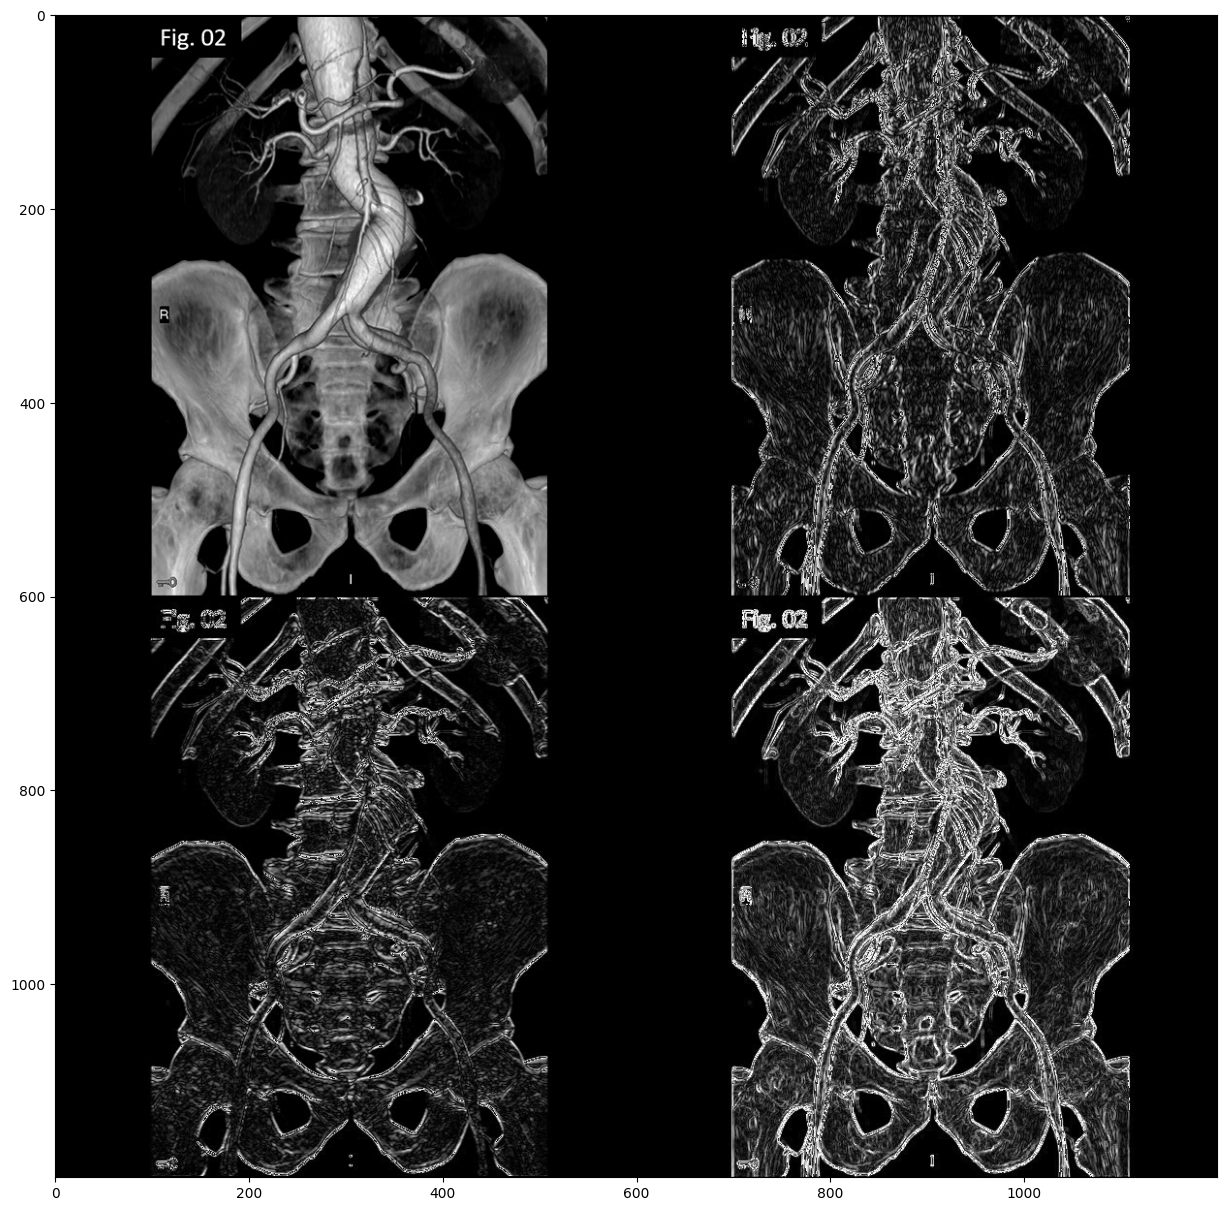

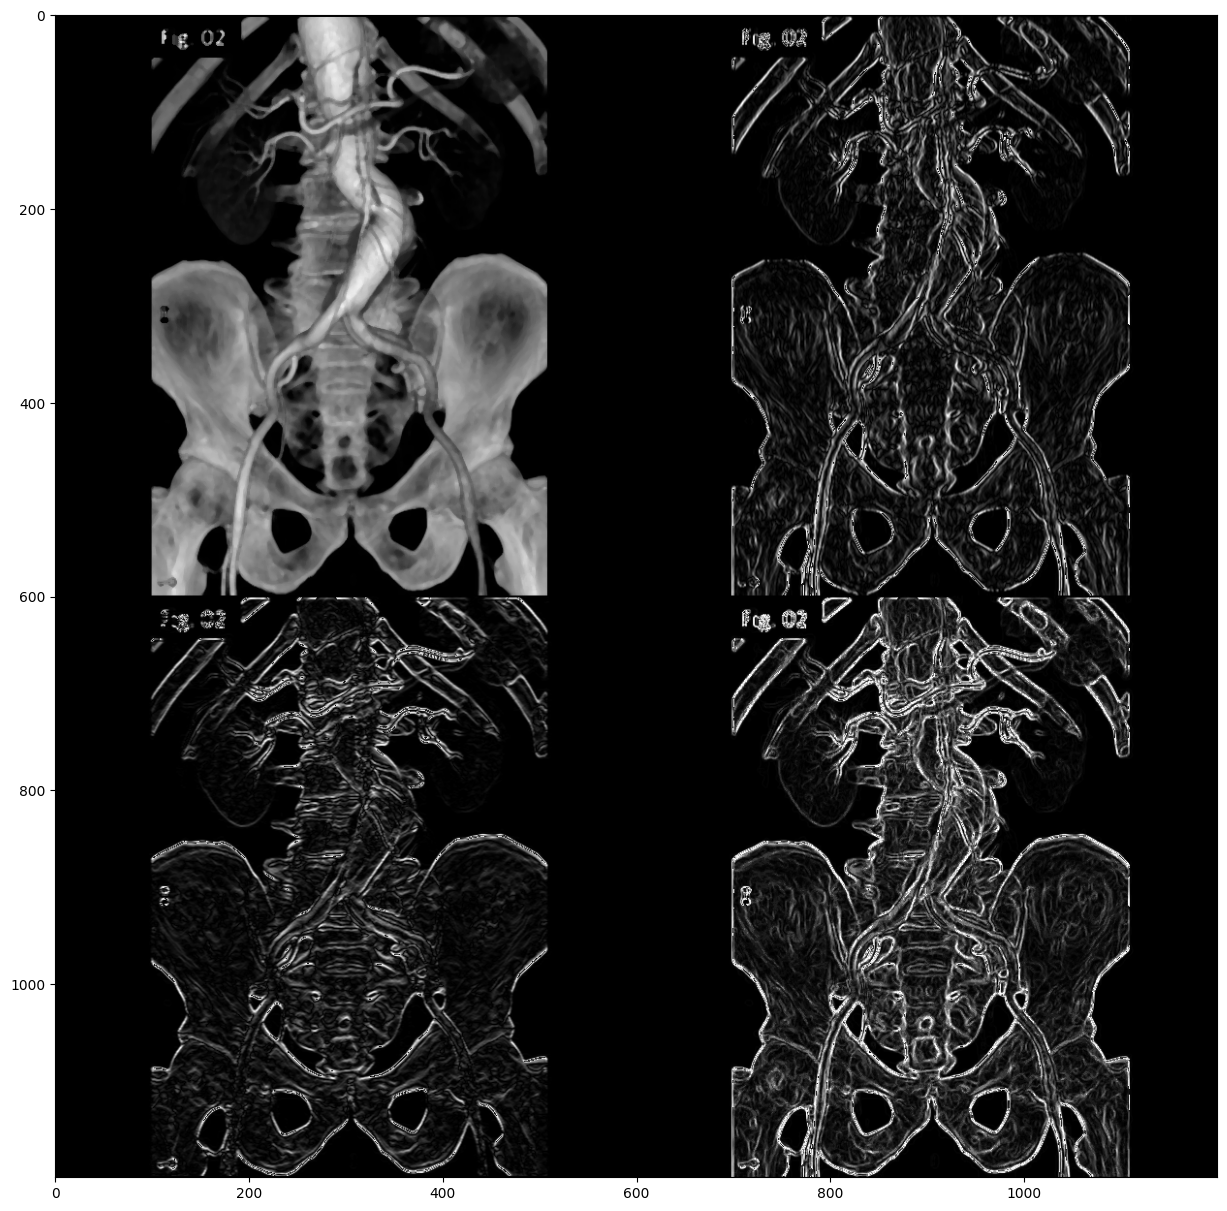

In [27]:
sobel_j = img_gray.copy()
sobel_jX = cv2.Sobel(sobel_j, cv2.CV_64F, 1, 0)
sobel_jY = cv2.Sobel(sobel_j, cv2.CV_64F, 0, 1)
sobel_jX = np.uint8(np.absolute(sobel_jX))
sobel_jY = np.uint8(np.absolute(sobel_jY))
sobelfinal_J = cv2.bitwise_or(sobel_jX, sobel_jY)
resultado = np.vstack([
  np.hstack([sobel_j, sobel_jX]),
  np.hstack([sobel_jY, sobelfinal_J])
  ])
plotar(resultado)
# cv2.imshow('sobel', resultado)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
sobel_j = img_mean.copy()
sobel_jX = cv2.Sobel(sobel_j, cv2.CV_64F, 1, 0)
sobel_jY = cv2.Sobel(sobel_j, cv2.CV_64F, 0, 1)
sobel_jX = np.uint8(np.absolute(sobel_jX))
sobel_jY = np.uint8(np.absolute(sobel_jY))
sobelfinal_J = cv2.bitwise_or(sobel_jX, sobel_jY)
resultado = np.vstack([
  np.hstack([sobel_j, sobel_jX]),
  np.hstack([sobel_jY, sobelfinal_J])
  ])
plotar(resultado)

## Roberts

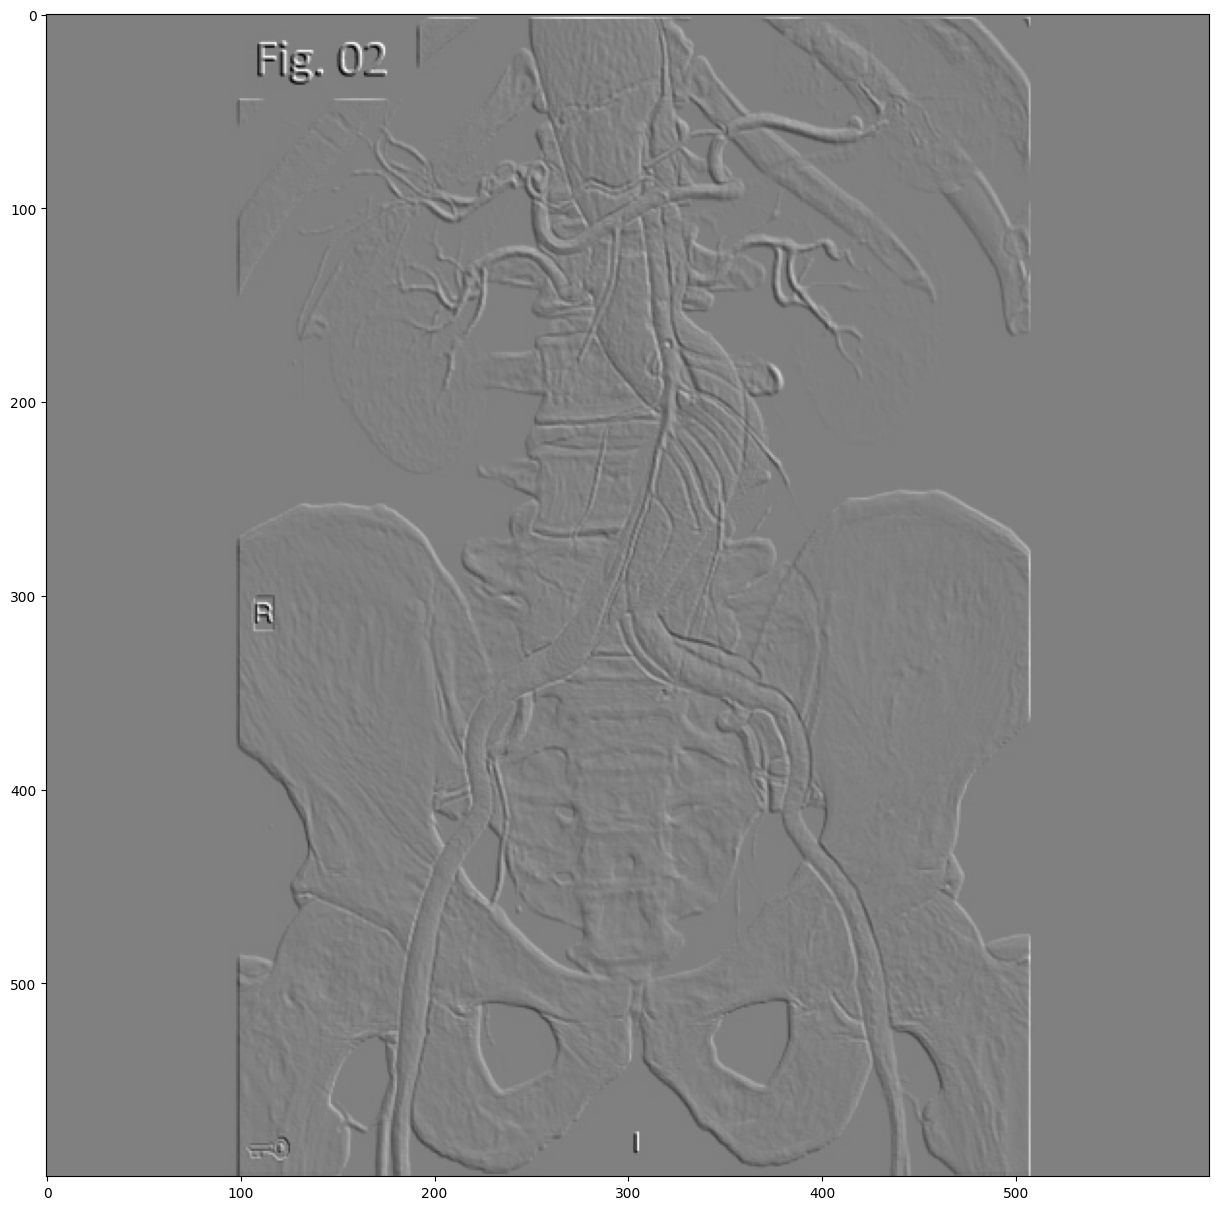

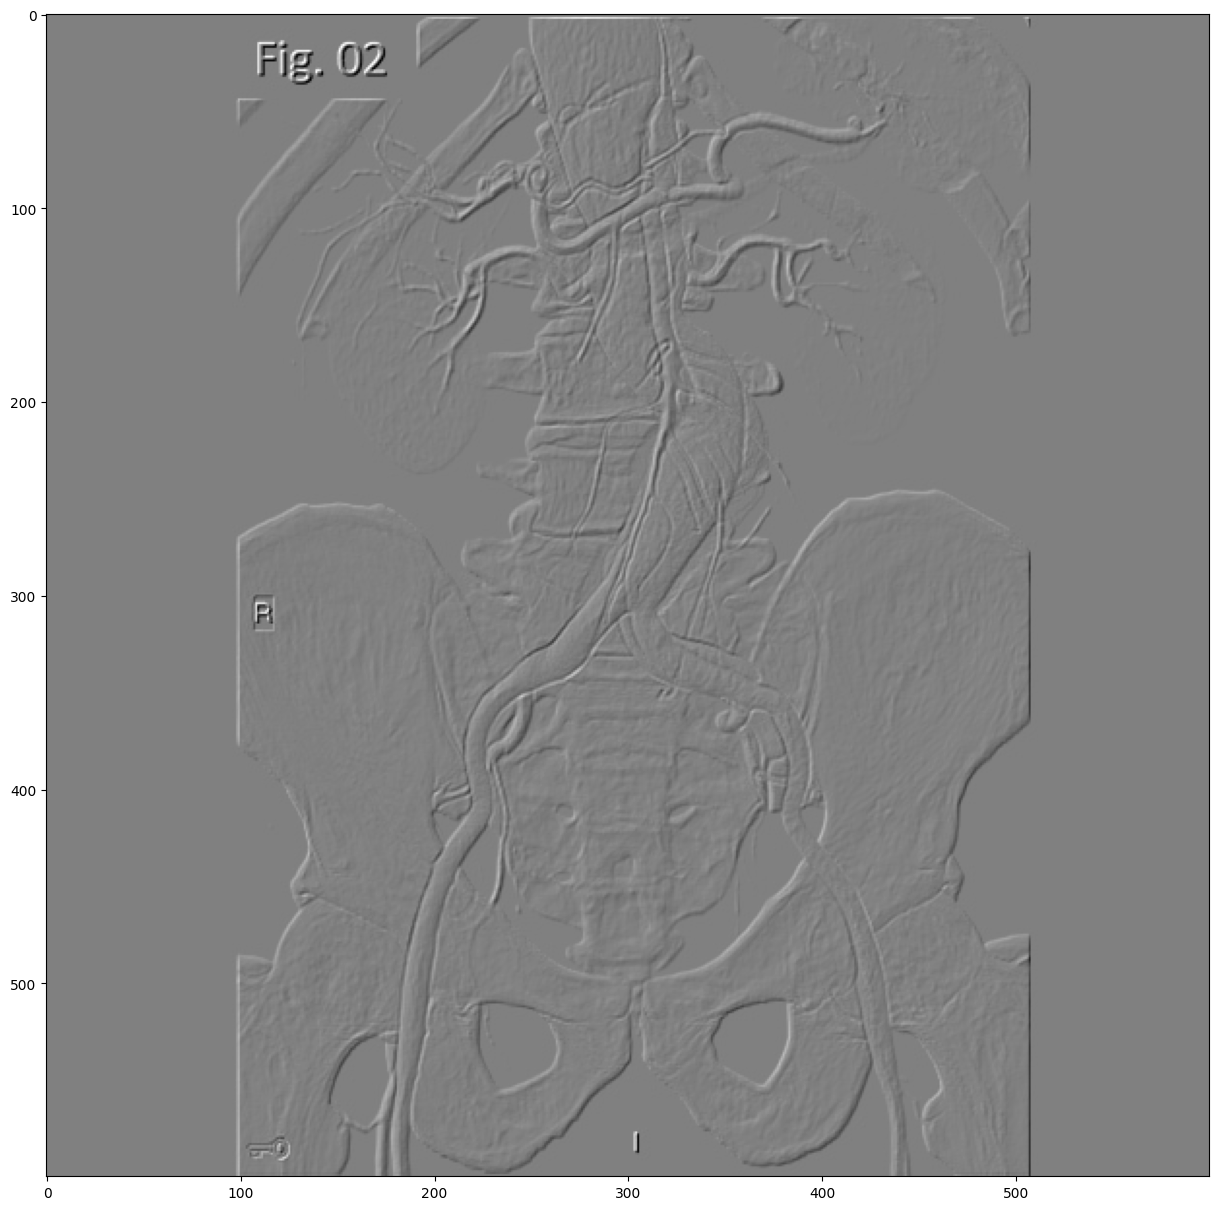

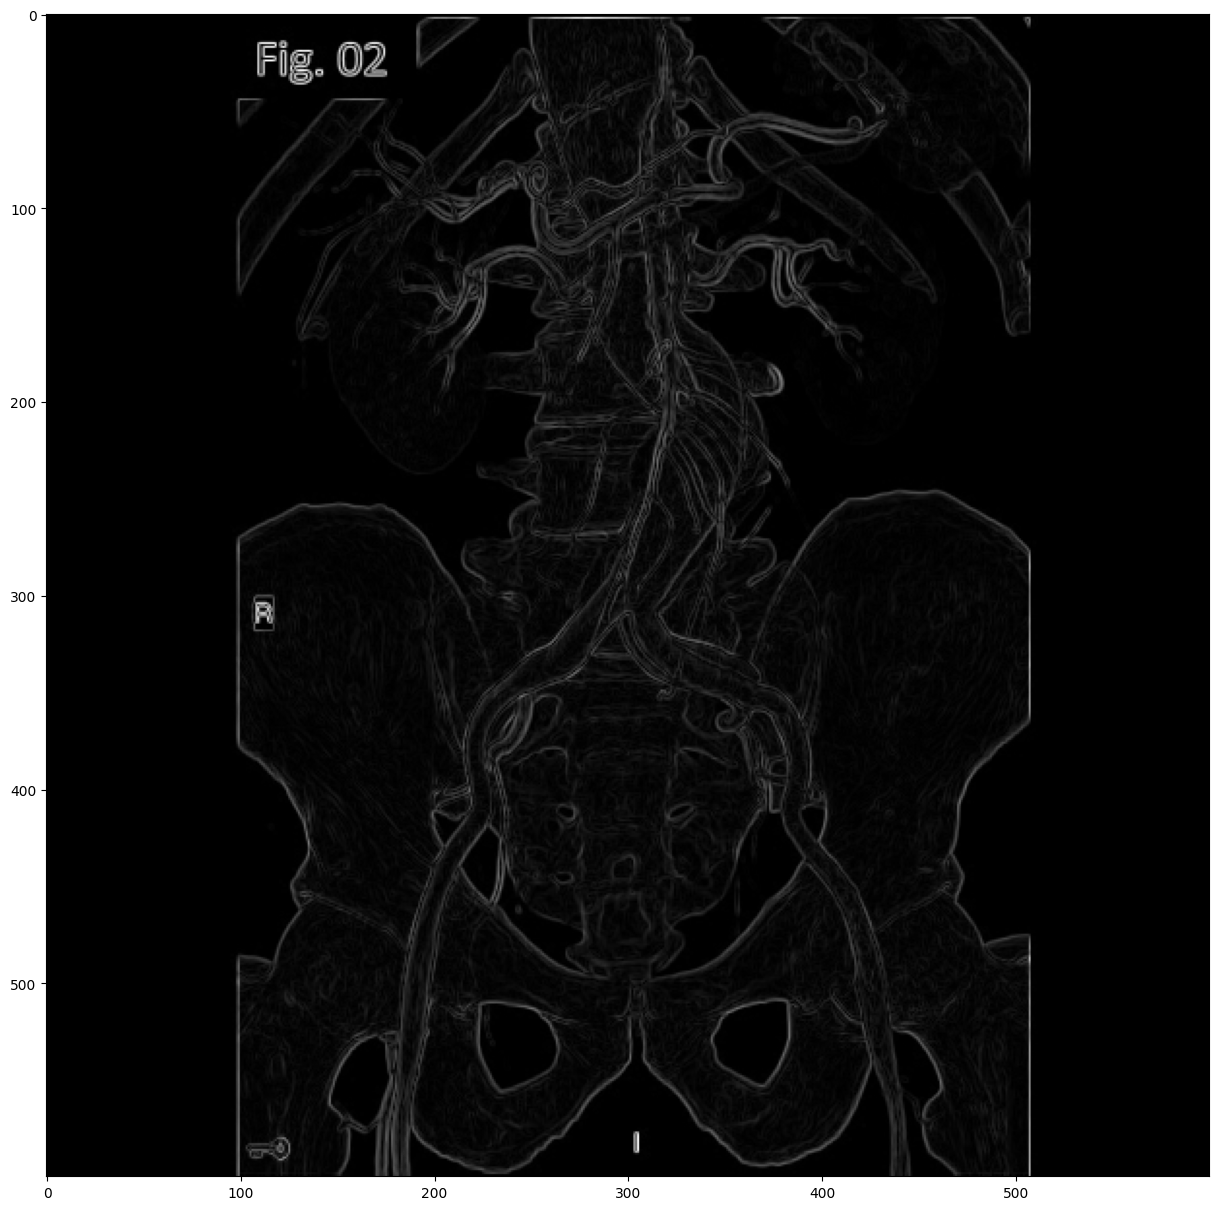

In [9]:
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
roberts_a = cv2.imread(img_path,0).astype('float64')
roberts_a/=255.0
vertical = ndimage.convolve( roberts_a, roberts_cross_v )
horizontal = ndimage.convolve( roberts_a, roberts_cross_h )
  
borda_roberts_a = np.sqrt( np.square(horizontal) + np.square(vertical))
borda_roberts_a*=255
plotar(horizontal)
plotar(vertical)
plotar(borda_roberts_a)

## Prewit

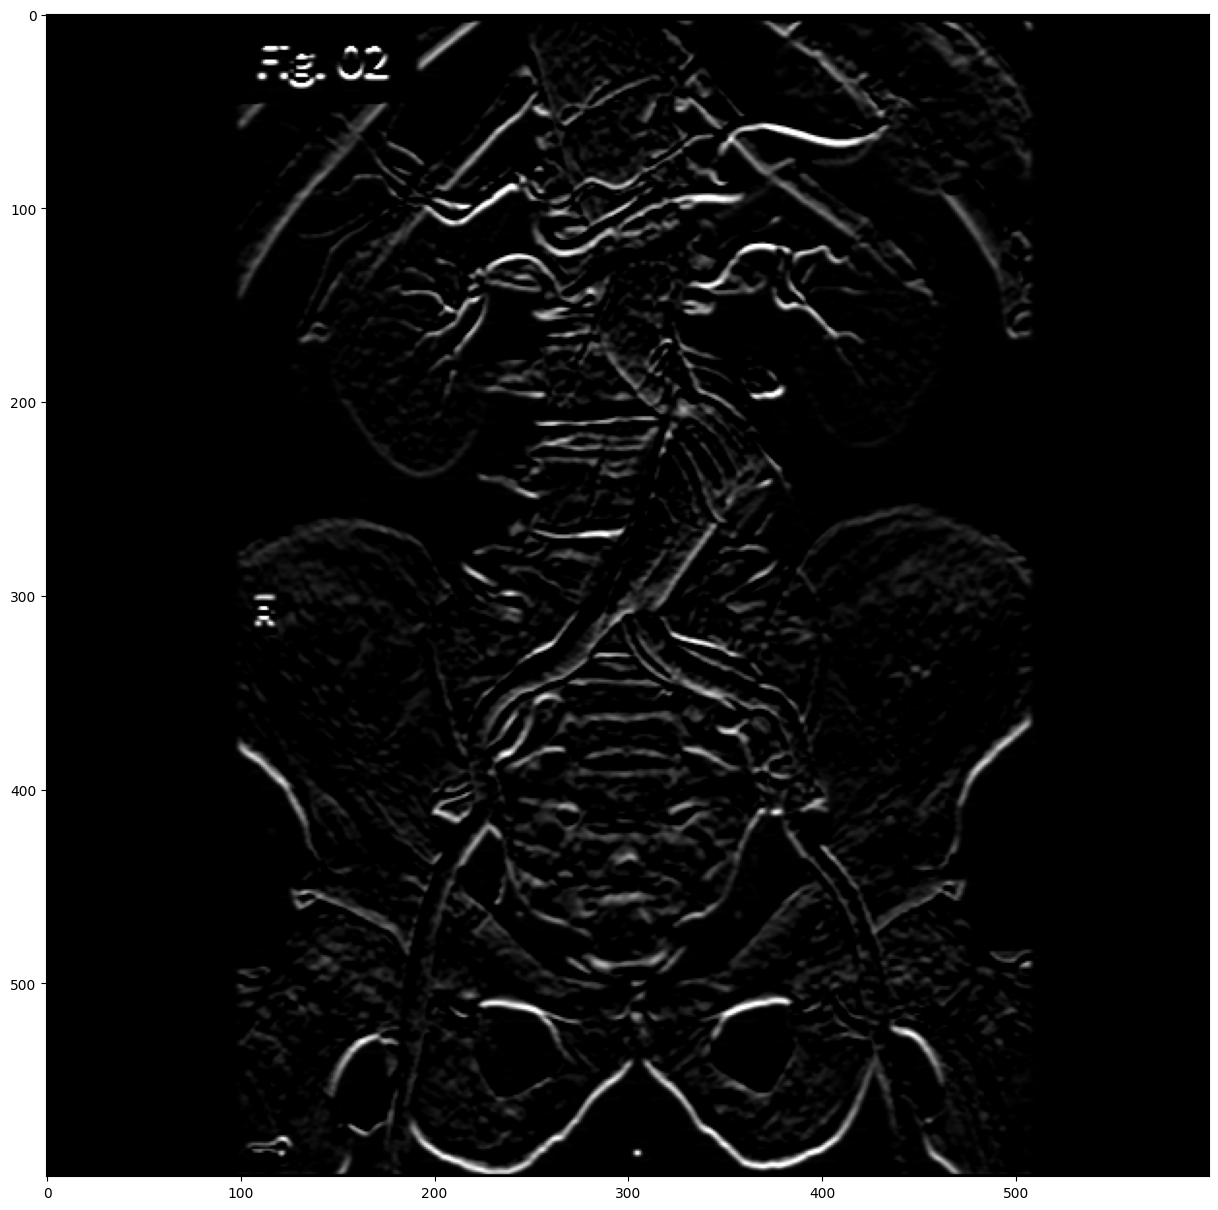

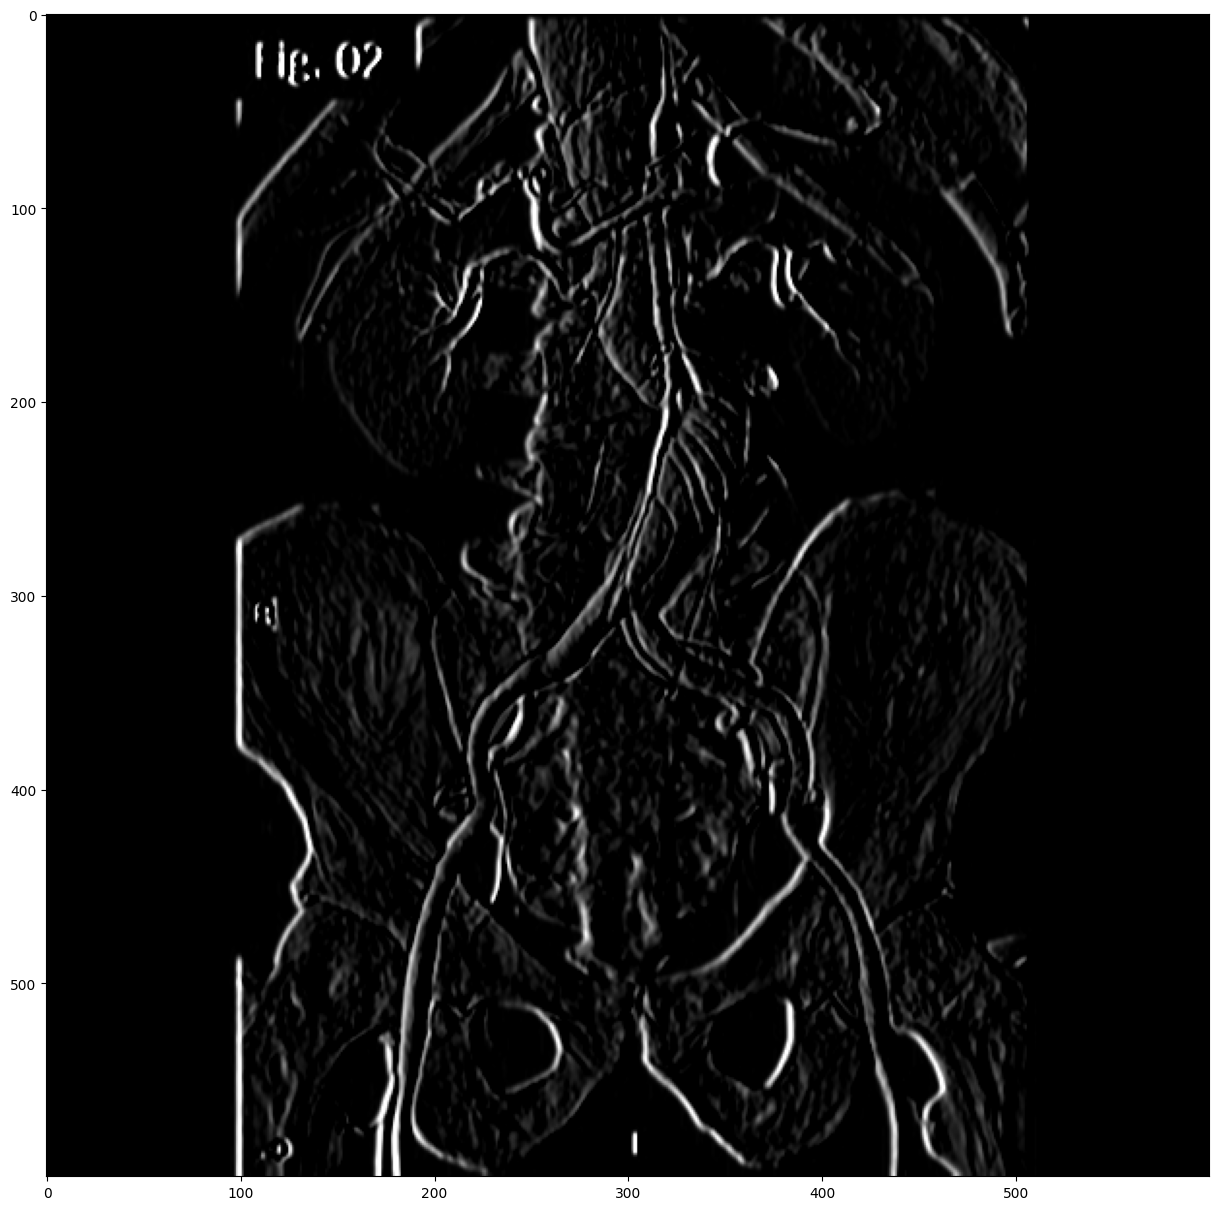

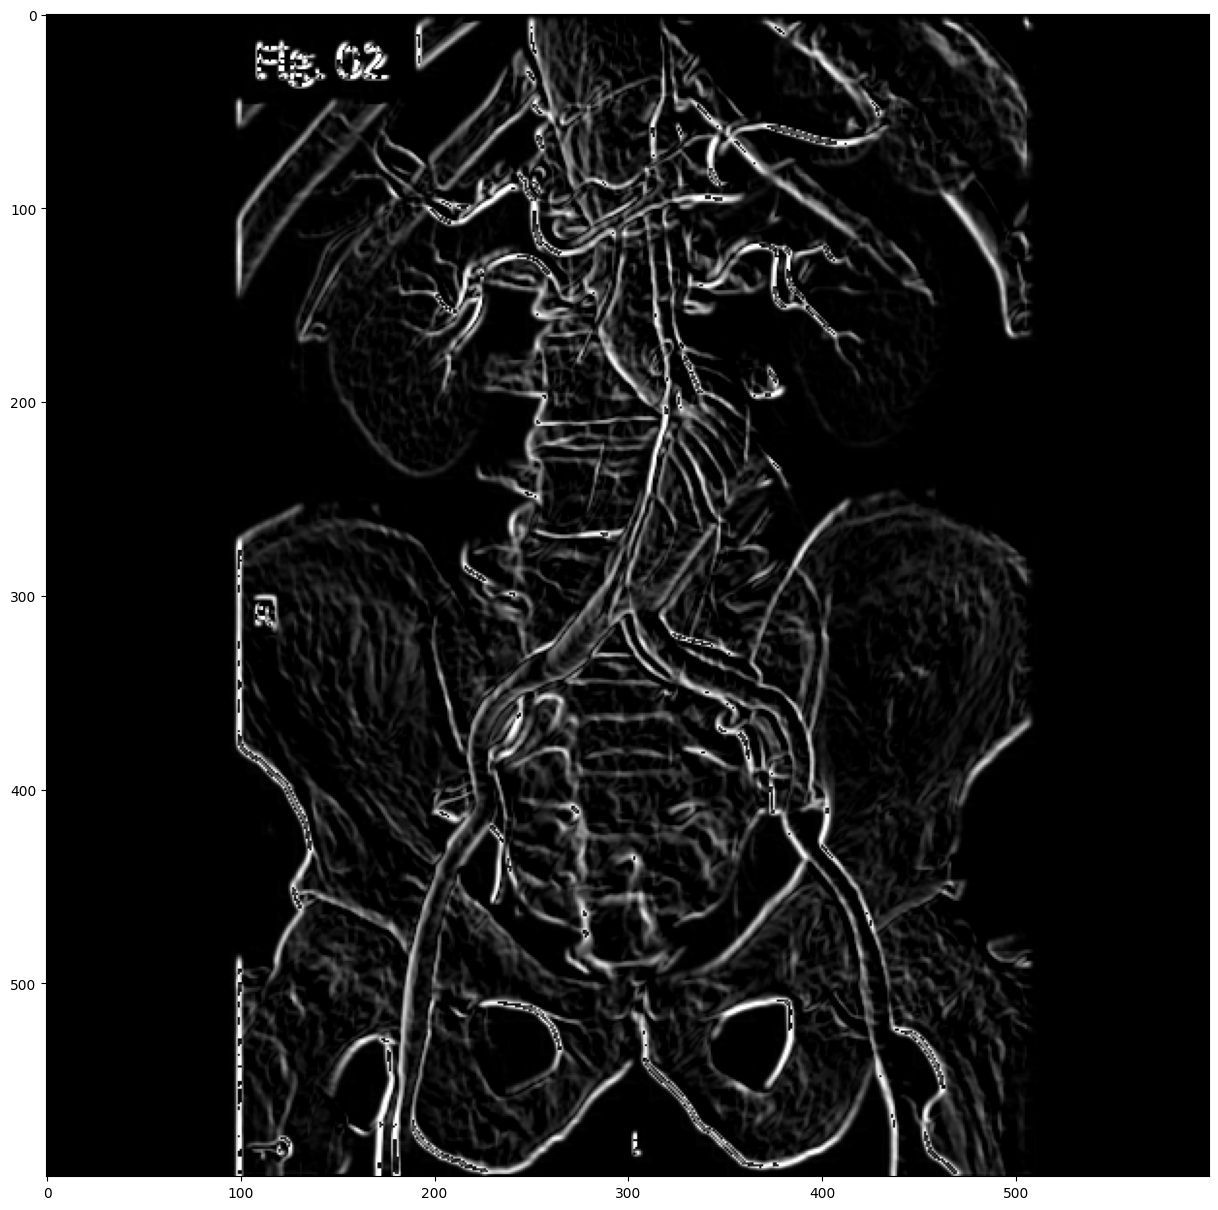

In [10]:
prewitt_j = cv2.imread(img_path)
gray1 = cv2.cvtColor(prewitt_j, cv2.COLOR_BGR2GRAY)
prewitt_j_gaussian = cv2.GaussianBlur(gray1,(3,3),0)

kernelx_j = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely_j = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_j_x = cv2.filter2D(prewitt_j_gaussian, -1, kernelx_j)
prewitt_j_y = cv2.filter2D(prewitt_j_gaussian, -1, kernely_j)

plotar(prewitt_j_x )
plotar(prewitt_j_y)
plotar(prewitt_j_x  + prewitt_j_y)

## Laplaciano

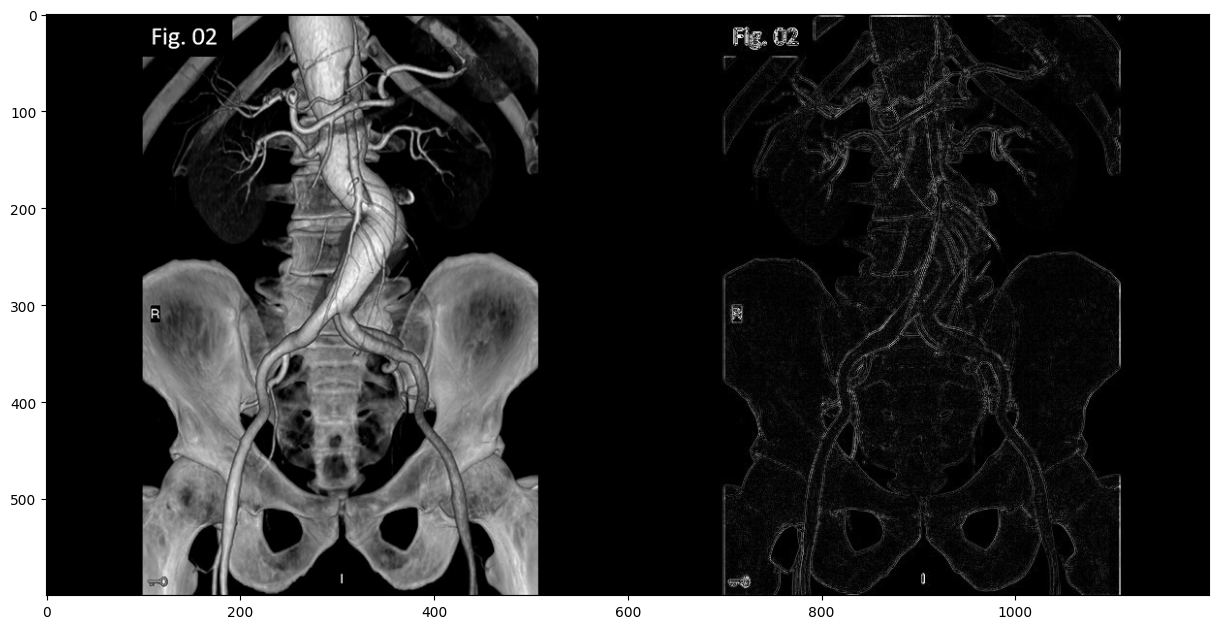

In [11]:
laplaciano_a = cv2.imread(img_path)
laplaciano_a = cv2.cvtColor(laplaciano_a, cv2.COLOR_BGR2GRAY)
lap_a = cv2.Laplacian(laplaciano_a, cv2.CV_64F)
lap_a = np.uint8(np.absolute(lap_a))
resultado = np.hstack([laplaciano_a, lap_a])
plotar(resultado)

# Questão 02

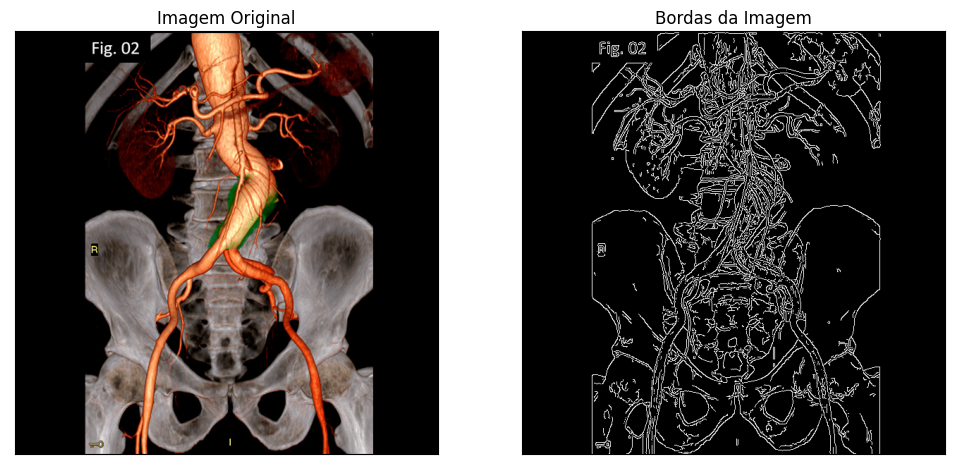

In [12]:
imagOrig = cv2.imread(img_path)

#Conversão para Escala de cinza

imagOrigRGB = cv2.cvtColor(imagOrig, cv2.COLOR_BGR2RGB)
imagOrigPB = cv2.cvtColor(imagOrig, cv2.COLOR_RGB2GRAY)

#Detecção de Bordas com Canny

bordas = cv2.Canny(imagOrig,100,200)
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(imagOrigRGB,cmap = 'gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bordas,cmap = 'gray')
plt.title('Bordas da Imagem'), plt.xticks([]), plt.yticks([])
#plt.savefig('resultado.jpg')
plt.show()

# Questão 03

In [13]:
def kmeans(img, k, itera, epsilon):
    try:
        _, _, channels = img.shape
        pixel_values = img.reshape((-1, channels))
    except:
        pixel_values = img.reshape((-1, 1))
        
    pixel_values = np.float32(pixel_values)
    print(f'Input: {pixel_values.shape}')
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, itera, epsilon)

    start = time.time()
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    end = time.time()
    print(f'Tempo de execução do algoritmo: {round(end-start,2)} segundos')

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img.shape)

    return segmented_image, centers

In [14]:
image, centers = kmeans(img_rgb, 4, 100, 0)
centers

Input: (360000, 3)
Tempo de execução do algoritmo: 1.77 segundos


array([[234, 143,  86],
       [145, 135, 134],
       [  5,   1,   1],
       [104,  72,  60]], dtype=uint8)

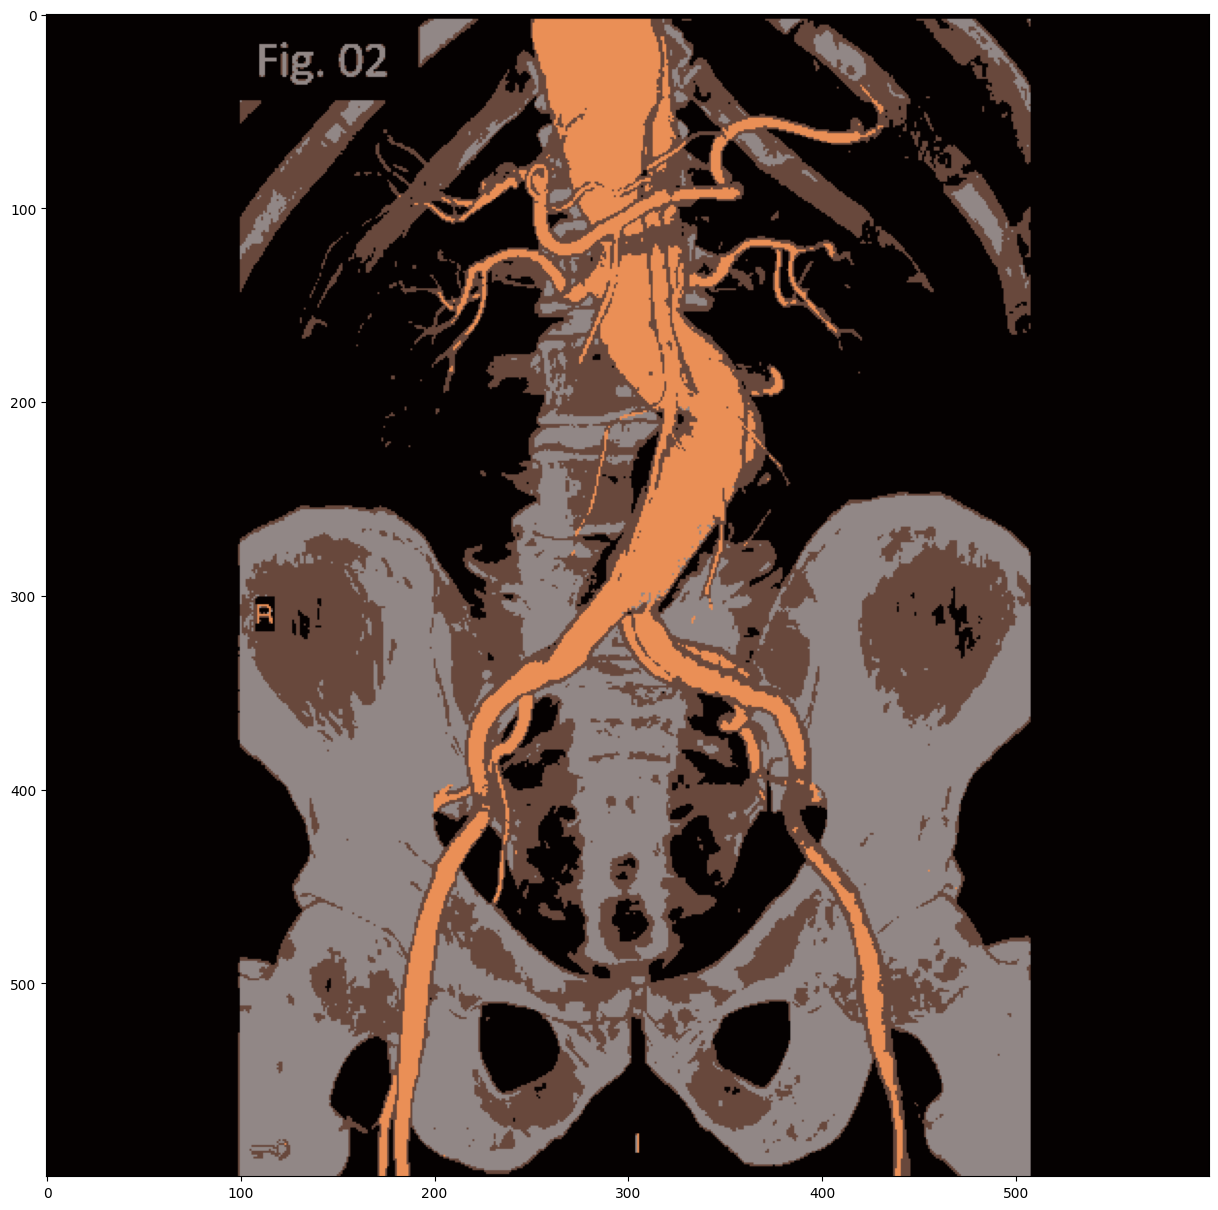

In [15]:
plotar(image)

# Questão 04

# Rascunho

In [16]:
aaa

NameError: name 'aaa' is not defined

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img_rgb)

In [ ]:
kernel = np.ones((8,8),np.float32)/64
img_rgb_blur = cv2.filter2D(img_rgb,-1,kernel)
kernel

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img_rgb_blur)

In [ ]:
img_rgb_blucv2 = cv2.blur(img_rgb,(8, 8))

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img_rgb_blucv2)

In [ ]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(img_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(img_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(grad_x, cmap='gray')

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(grad_y, cmap='gray')

In [ ]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
grad2 = cv2.add(abs_grad_x, abs_grad_y)

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(grad, cmap='gray')

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(grad2, cmap='gray')